In [ ]:
import re
import string
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
# from jupytertehmes import jtplot

import umap
from sklearn.decomposition import TruncatedSVD, PCA, NMF, LatentDirichletAllocation
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups

from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from gensim import corpora
from gensim.models.ldamodel import LdaModel

In [ ]:
# set plot rc parameters

# jtplot.style(grid=False)
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = '#464646'
#plt.rcParams['axes.edgecolor'] = '#FFFFFF'
plt.rcParams['figure.figsize'] = 10, 7
plt.rcParams['text.color'] = '#666666'
plt.rcParams['axes.labelcolor'] = '#666666'
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.color'] = '#666666'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.color'] = '#666666'
plt.rcParams['ytick.labelsize'] = 14

# plt.rcParams['font.size'] = 16

sns.color_palette('dark')
%matplotlib inline

In [ ]:
# Load news data set
# remove meta data headers footers and quotes from news dataset
dataset = fetch_20newsgroups(subset='train',shuffle=True,
                            random_state=32,
                            remove=('headers', 'footers', 'qutes'))

In [ ]:
# sneak peek of the news articles
for idx in range(10):
    print(dataset.data[idx],'\n\n','#'*100, '\n\n')

The real question here in my opinion is what Motorola processors running system
7 on a MAC are comparable to what Intel processors running Windows on a PC?  I
recall there being a conversation here that a 486/25 running Windows benchmarks
at about the same speed as 25Mhz 030 in system 7.  I don't know if that is
true, but I would love to hear if anyone has any technical data on this.

-David 

 #################################################################################################### 


Please could someone in the US give me the current street 
prices on the following, with and without any relevant taxes:

 8 Mb 72 pin SIMM
16 Mb 72 pin SIMM (both for Mac LC III)

Are any tax refunds possible if they are to be exported
to the UK? Can you recommend a reliable supplier? 

 #################################################################################################### 


Can somebody please help me with information about an
American Magnetics Corporation Magstripe Card Read

In [ ]:
# put your data into a dataframe
news_df = pd.DataFrame({'News': dataset.data,
                       'Target': dataset.target})

# get dimensions of data 
news_df.shape

(11314, 2)

In [ ]:
news_df.head()

,News,Target
0,The real question here in my opinion is what M...,4
1,Please could someone in the US give me the cur...,4
2,Can somebody please help me with information a...,12
3,In article <2077@rwing.UUCP> pat@rwing.UUCP (P...,16
4,"From article <1pq6i2$a1f@news.ysu.edu>, by ak2...",7


In [ ]:
# replace target names from target numbers in our news data frame
news_df['Target_name'] = news_df['Target'].apply(lambda x: dataset.target_names[x])

In [ ]:
news_df.head()

,News,Target,Target_name
0,The real question here in my opinion is what M...,4,comp.sys.mac.hardware
1,Please could someone in the US give me the cur...,4,comp.sys.mac.hardware
2,Can somebody please help me with information a...,12,sci.electronics
3,In article <2077@rwing.UUCP> pat@rwing.UUCP (P...,16,talk.politics.guns
4,"From article <1pq6i2$a1f@news.ysu.edu>, by ak2...",7,rec.autos


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

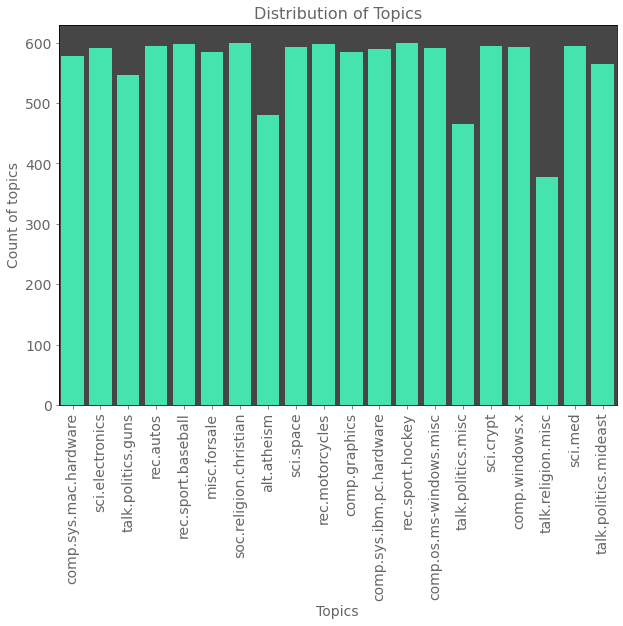

In [ ]:
# plot distribution of topics in news data
fig = plt.figure(figsize=[10,7])
ax = sns.countplot(news_df['Target_name'], color=sns.xkcd_rgb['greenish cyan'])
plt.title('Distribution of Topics')
plt.xlabel('Topics')
plt.ylabel('Count of topics')
plt.xticks(rotation=90)

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# clean text data
# remove non alphabetic characters
# remove stopwords and lemmatize

def clean_text(sentence):
    # remove non alphabetic sequences
    pattern = re.compile(r'[^a-z]+')
    sentence = sentence.lower()
    sentence = pattern.sub(' ', sentence).strip()
    
    # Tokenize
    word_list = word_tokenize(sentence)
    
    # stop words
    stopwords_list = set(stopwords.words('english'))
    # puctuation
    # punct = set(string.punctuation)

    # remove stop words
    word_list = [word for word in word_list if word not in stopwords_list]
    # remove very small words, length < 3
    # they don't contribute any useful information
    word_list = [word for word in word_list if len(word) > 2]
    # remove punctuation
    # word_list = [word for word in word_list if word not in punct]
    
    # stemming
    # ps  = PorterStemmer()
    # word_list = [ps.stem(word) for word in word_list]
    
    # lemmatize
    lemma = WordNetLemmatizer()
    word_list = [lemma.lemmatize(word) for word in word_list]
    # list to sentence
    sentence = ' '.join(word_list)
    
    return sentence

# we'll use tqdm to monitor progress of data cleaning process
# create tqdm for pandas
tqdm.pandas()
# clean text data
news_df['News'] = news_df['News'].progress_apply(lambda x: clean_text(str(x)))

100%|██████████| 11314/11314 [00:19<00:00, 572.45it/s]


In [ ]:
news_df.head()

,News,Target,Target_name
0,real question opinion motorola processor runni...,4,comp.sys.mac.hardware
1,please could someone give current street price...,4,comp.sys.mac.hardware
2,somebody please help information american magn...,12,sci.electronics
3,article rwing uucp pat rwing uucp pat myrto wr...,16,talk.politics.guns
4,article news ysu edu yfn ysu edu john daker cu...,7,rec.autos


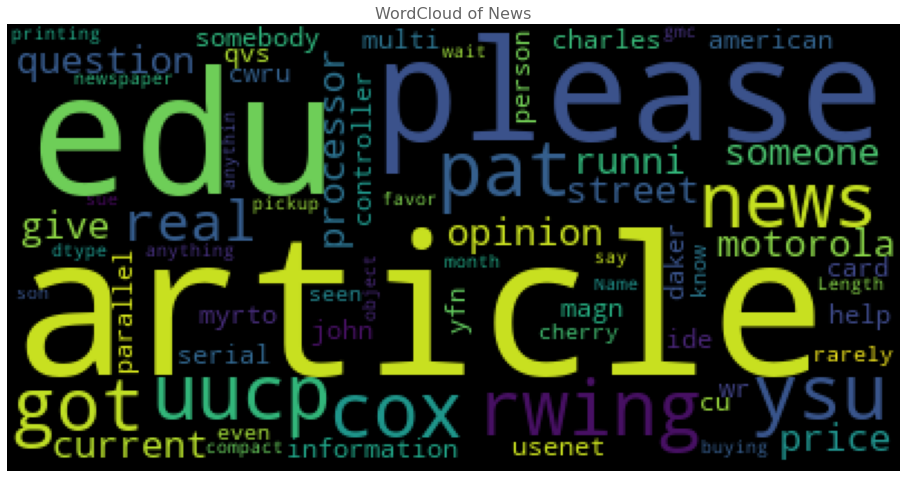

In [ ]:
# plot word count for news text
wordcloud = WordCloud(background_color='black',
                      max_words=200).generate(str(news_df['News']))
fig = plt.figure(figsize=[16,16])
plt.title('WordCloud of News')
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [ ]:
# vectorize text data
tfidf_vec = TfidfVectorizer(tokenizer=lambda x: str(x).split())
X = tfidf_vec.fit_transform(news_df['News'])
X.shape

(11314, 73392)

In [ ]:
# t-SNE
tsne = TSNE(n_components=2,
           perplexity=50,
           learning_rate=300,
           n_iter=800,
           verbose=1)
# tsne to our document vectors
componets = tsne.fit_transform(X)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 11314 samples in 0.019s...


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float


[t-SNE] Computed neighbors for 11314 samples in 11.111s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11314
[t-SNE] Computed conditional probabilities for sample 2000 / 11314
[t-SNE] Computed conditional probabilities for sample 3000 / 11314
[t-SNE] Computed conditional probabilities for sample 4000 / 11314
[t-SNE] Computed conditional probabilities for sample 5000 / 11314
[t-SNE] Computed conditional probabilities for sample 6000 / 11314
[t-SNE] Computed conditional probabilities for sample 7000 / 11314
[t-SNE] Computed conditional probabilities for sample 8000 / 11314
[t-SNE] Computed conditional probabilities for sample 9000 / 11314
[t-SNE] Computed conditional probabilities for sample 10000 / 11314
[t-SNE] Computed conditional probabilities for sample 11000 / 11314
[t-SNE] Computed conditional probabilities for sample 11314 / 11314
[t-SNE] Mean sigma: 0.497289


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:348: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  error = np.finfo(np.float).max
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:349: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  best_error = np.finfo(np.float).max


[t-SNE] KL divergence after 250 iterations with early exaggeration: 166.125488


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:348: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  error = np.finfo(np.float).max
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:349: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  best_error = np.finfo(np.float).max


[t-SNE] KL divergence after 800 iterations: 4.507278


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


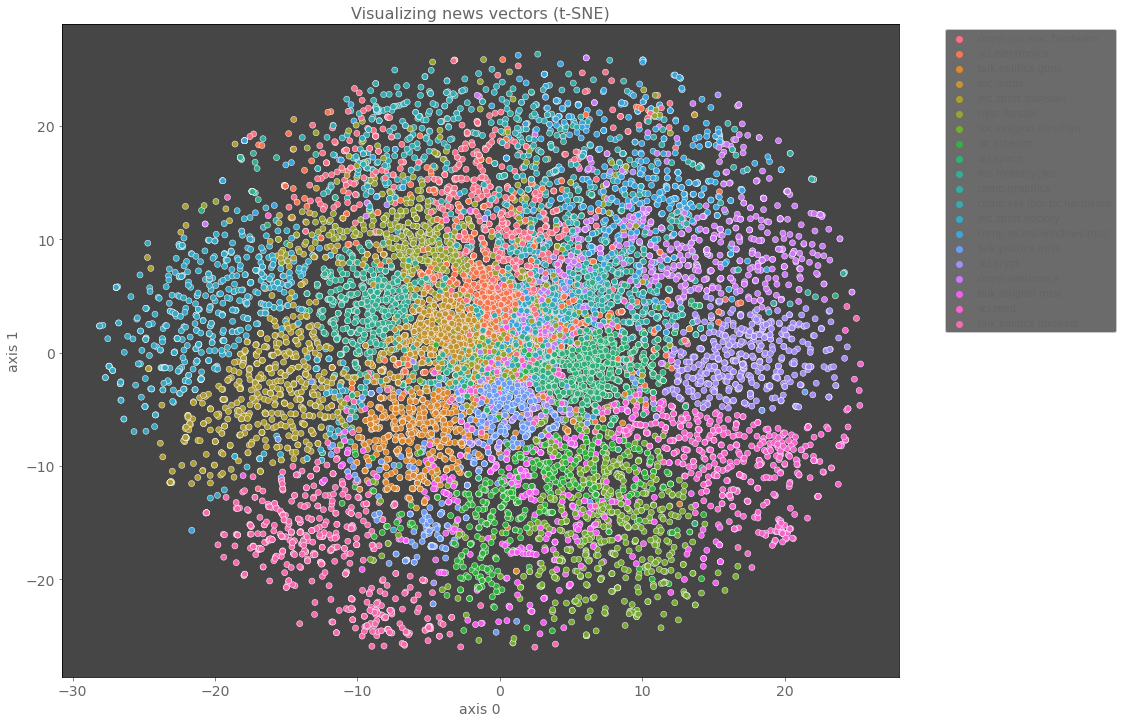

In [ ]:
# plot news vectors
def plot_embeddings(embedding, title):
    fig = plt.figure(figsize=[15,12])
    ax = sns.scatterplot(embedding[:,0], embedding[:,1], hue=news_df['Target_name'])
    plt.title(title)
    plt.xlabel('axis 0')
    plt.ylabel('axis 1')
    plt.legend(bbox_to_anchor=(1.05,1), loc=2)
    plt.show()
    return

plot_embeddings(componets, 'Visualizing news vectors (t-SNE)')

In [ ]:
texts = news_df['News'].to_list()
for i,sent in enumerate(texts):
  texts[i] = nltk.word_tokenize(sent)
texts[:10]

[['real',
  'question',
  'opinion',
  'motorola',
  'processor',
  'running',
  'system',
  'mac',
  'comparable',
  'intel',
  'processor',
  'running',
  'window',
  'recall',
  'conversation',
  'running',
  'window',
  'benchmark',
  'speed',
  'mhz',
  'system',
  'know',
  'true',
  'would',
  'love',
  'hear',
  'anyone',
  'technical',
  'data',
  'david'],
 ['please',
  'could',
  'someone',
  'give',
  'current',
  'street',
  'price',
  'following',
  'without',
  'relevant',
  'tax',
  'pin',
  'simm',
  'pin',
  'simm',
  'mac',
  'iii',
  'tax',
  'refund',
  'possible',
  'exported',
  'recommend',
  'reliable',
  'supplier'],
 ['somebody',
  'please',
  'help',
  'information',
  'american',
  'magnetics',
  'corporation',
  'magstripe',
  'card',
  'reader',
  'recently',
  'bought',
  'locally',
  'surplus',
  'dealer',
  'rear',
  'following',
  'information',
  'american',
  'magnetics',
  'corporation',
  'carson',
  'usa',
  'magstripe',
  'card',
  'reader',
  '

In [ ]:
dictionary = corpora.Dictionary(texts)
doc_term_matrix = [dictionary.doc2bow(txt) for txt in texts]

In [ ]:
import gensim
from gensim import corpora

# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=10)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [ ]:
lda_model.print_topics()

[(0,
  '0.006*"year" + 0.005*"people" + 0.005*"one" + 0.005*"gun" + 0.005*"edu" + 0.004*"would" + 0.004*"said" + 0.004*"armenian" + 0.004*"time" + 0.003*"new"'),
 (1,
  '0.007*"space" + 0.005*"would" + 0.005*"edu" + 0.004*"writes" + 0.004*"one" + 0.004*"get" + 0.003*"article" + 0.003*"new" + 0.003*"orbit" + 0.003*"mission"'),
 (2,
  '0.009*"drive" + 0.008*"one" + 0.006*"would" + 0.006*"game" + 0.005*"card" + 0.005*"team" + 0.005*"get" + 0.005*"like" + 0.005*"time" + 0.005*"know"'),
 (3,
  '0.010*"edu" + 0.008*"would" + 0.008*"article" + 0.007*"writes" + 0.007*"people" + 0.005*"think" + 0.005*"know" + 0.004*"get" + 0.004*"like" + 0.004*"state"'),
 (4,
  '0.059*"max" + 0.006*"bhj" + 0.005*"giz" + 0.004*"scx" + 0.004*"chz" + 0.003*"qax" + 0.003*"lib" + 0.003*"bxn" + 0.003*"oname" + 0.003*"printf"'),
 (5,
  '0.009*"edu" + 0.009*"file" + 0.005*"program" + 0.005*"com" + 0.005*"image" + 0.004*"system" + 0.004*"data" + 0.004*"also" + 0.004*"use" + 0.004*"scsi"'),
 (6,
  '0.010*"window" + 0.007

In [ ]:
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt


Perplexity:  -8.840410308861234

Coherence Score:  0.4063628329268577


### Working with the test data on the trained model

In [ ]:
data_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

In [ ]:
print(data_test.data[0])
print('-'*75)
print(data_test.data[1])

I am a little confused on all of the models of the 88-89 bonnevilles.
I have heard of the LE SE LSE SSE SSEI. Could someone tell me the
differences are far as features or performance. I am also curious to
know what the book value is for prefereably the 89 model. And how much
less than book value can you usually get them for. In other words how
much are they in demand this time of year. I have heard that the mid-spring
early summer is the best time to buy.
---------------------------------------------------------------------------
I'm not familiar at all with the format of these "X-Face:" thingies, but
after seeing them in some folks' headers, I've *got* to *see* them (and
maybe make one of my own)!

I've got "dpg-view" on my Linux box (which displays "uncompressed X-Faces")
and I've managed to compile [un]compface too... but now that I'm *looking*
for them, I can't seem to find any X-Face:'s in anyones news headers!  :-(

Could you, would you, please send me your "X-Face:" header?

I *

In [ ]:
test_df = pd.DataFrame({'test_data': data_test.data})
test_df.head()

,test_data
0,I am a little confused on all of the models of...
1,I'm not familiar at all with the format of the...
2,"\nIn a word, yes.\n"
3,\nThey were attacking the Iraqis to drive them...
4,\nI've just spent two solid months arguing tha...


In [ ]:
test_df['test_data'] = test_df['test_data'].progress_apply(lambda x: clean_text(str(x)))

100%|██████████| 7532/7532 [00:10<00:00, 748.38it/s]


In [ ]:
test_df.head()

,test_data
0,little confused model bonnevilles heard lse ss...
1,familiar format face thingies seeing folk head...
2,word yes
3,attacking iraqi drive kuwait country whose cit...
4,spent two solid month arguing thing objective ...


In [ ]:
# Create a new corpus, made of previously unseen documents.
other_texts = test_df['test_data'].to_list()
for i,sent in enumerate(other_texts):
  other_texts[i] = nltk.word_tokenize(sent)
other_texts[:2]

[['little',
  'confused',
  'model',
  'bonnevilles',
  'heard',
  'lse',
  'sse',
  'ssei',
  'could',
  'someone',
  'tell',
  'difference',
  'far',
  'feature',
  'performance',
  'also',
  'curious',
  'know',
  'book',
  'value',
  'prefereably',
  'model',
  'much',
  'le',
  'book',
  'value',
  'usually',
  'get',
  'word',
  'much',
  'demand',
  'time',
  'year',
  'heard',
  'mid',
  'spring',
  'early',
  'summer',
  'best',
  'time',
  'buy'],
 ['familiar',
  'format',
  'face',
  'thingies',
  'seeing',
  'folk',
  'header',
  'got',
  'see',
  'maybe',
  'make',
  'one',
  'got',
  'dpg',
  'view',
  'linux',
  'box',
  'display',
  'uncompressed',
  'face',
  'managed',
  'compile',
  'compface',
  'looking',
  'seem',
  'find',
  'face',
  'anyones',
  'news',
  'header',
  'could',
  'would',
  'please',
  'send',
  'face',
  'header',
  'know',
  'probably',
  'get',
  'little',
  'swamped',
  'handle',
  'hope']]

In [ ]:
common_dictionary = corpora.Dictionary(other_texts)
other_corpus = [common_dictionary.doc2bow(text) for text in other_texts]      # document-term matrix of test data

In [ ]:
print('\nPerplexity: ', lda_model.log_perplexity(other_corpus,total_docs=10000))

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=other_texts, dictionary=common_dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt


Perplexity:  -11.911641248525088

Coherence Score:  0.5039997090382874


In [ ]:
doc_dist = []

# get topic probability distribution for a document
for i in range(len(other_corpus)):
  unseen_doc = other_corpus[i]
  vector = lda_model[unseen_doc]
  doc_dist.append(vector)

In [ ]:
other_corpus[2]

[(33, 1), (68, 1)]

In [ ]:
doc_dist[:10]

[[(2, 0.77139777), (9, 0.20955022)],
 [(1, 0.053872045), (2, 0.19731607), (8, 0.34698784), (9, 0.38818467)],
 [(0, 0.03333625),
  (1, 0.033346422),
  (2, 0.6999335),
  (3, 0.0333408),
  (4, 0.03333465),
  (5, 0.033340625),
  (6, 0.03334258),
  (7, 0.03334068),
  (8, 0.033341963),
  (9, 0.03334244)],
 [(2, 0.20479427),
  (3, 0.43968913),
  (5, 0.03969001),
  (6, 0.010105617),
  (7, 0.07972818),
  (9, 0.22477306)],
 [(0, 0.14321753), (2, 0.7840377)],
 [(2, 0.31382045),
  (3, 0.033205263),
  (6, 0.14763166),
  (7, 0.35428178),
  (9, 0.14891443)],
 [(2, 0.16646881), (3, 0.60125685), (8, 0.17392781)],
 [(2, 0.11546948), (6, 0.2807791), (7, 0.5254235), (9, 0.06582507)],
 [(2, 0.29434836),
  (5, 0.22198111),
  (6, 0.03529962),
  (7, 0.32056275),
  (8, 0.106064156)],
 [(0, 0.02947182),
  (2, 0.14340127),
  (3, 0.24383727),
  (7, 0.4398269),
  (9, 0.13402696)]]

In [ ]:
ar = lda_model.get_topics()
print(ar.shape)
print('-'*65)
print(ar)
print('-'*65)

(10, 73392)
-----------------------------------------------------------------
[[6.4911979e-04 7.1259871e-07 6.6744884e-05 ... 6.9314933e-07
  6.9314933e-07 6.9314933e-07]
 [1.3570898e-03 8.0946552e-07 2.7747830e-05 ... 2.5636489e-06
  2.5636489e-06 2.5636489e-06]
 [3.4165389e-03 1.2088109e-04 1.0559984e-04 ... 2.5984739e-06
  2.5984739e-06 2.5984739e-06]
 ...
 [1.4452452e-03 3.4965717e-05 2.3438572e-05 ... 6.8152794e-06
  6.8152794e-06 6.8152794e-06]
 [2.0507250e-03 6.1464234e-06 3.0637868e-05 ... 5.6192920e-07
  5.6192920e-07 5.6192920e-07]
 [1.3221024e-03 8.4899909e-07 2.2638129e-05 ... 1.6069771e-05
  1.6069771e-05 1.6069771e-05]]
-----------------------------------------------------------------


In [ ]:
lda_model.inference(other_corpus,collect_sstats=True)

(array([[ 0.10001425,  0.10001697, 36.81329   , ...,  0.10001939,
          0.1000201 ,  0.10001673],
        [ 0.10001741,  0.10003023, 22.57274   , ...,  3.4818804 ,
          0.10002178,  0.10002729],
        [ 0.10001405,  0.10002201,  2.0998821 , ...,  0.10001544,
          0.1000161 ,  0.1000092 ],
        ...,
        [ 8.564241  ,  0.10002649, 14.370267  , ..., 11.346209  ,
          4.940381  ,  0.10004029],
        [ 0.10002412, 25.782305  , 12.167529  , ...,  0.10005219,
          9.301008  ,  0.100017  ],
        [ 0.10001047,  0.10001732,  3.9656239 , ...,  5.8091326 ,
          4.8144484 ,  7.0491753 ]], dtype=float32),
 array([[8.1448898e+01, 5.3826364e-04, 4.9461710e-06, ..., 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        [1.4151929e+02, 3.5534138e-03, 1.9236525e-06, ..., 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        [8.5982654e+02, 5.2172949e+02, 1.9716645e+00, ..., 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        ...,
   

In [ ]:
lda_model.print_topics()

[(0,
  '0.006*"year" + 0.005*"people" + 0.005*"one" + 0.005*"gun" + 0.005*"edu" + 0.004*"would" + 0.004*"said" + 0.004*"armenian" + 0.004*"time" + 0.003*"new"'),
 (1,
  '0.007*"space" + 0.005*"would" + 0.005*"edu" + 0.004*"writes" + 0.004*"one" + 0.004*"get" + 0.003*"article" + 0.003*"new" + 0.003*"orbit" + 0.003*"mission"'),
 (2,
  '0.009*"drive" + 0.008*"one" + 0.006*"would" + 0.006*"game" + 0.005*"card" + 0.005*"team" + 0.005*"get" + 0.005*"like" + 0.005*"time" + 0.005*"know"'),
 (3,
  '0.010*"edu" + 0.008*"would" + 0.008*"article" + 0.007*"writes" + 0.007*"people" + 0.005*"think" + 0.005*"know" + 0.004*"get" + 0.004*"like" + 0.004*"state"'),
 (4,
  '0.059*"max" + 0.006*"bhj" + 0.005*"giz" + 0.004*"scx" + 0.004*"chz" + 0.003*"qax" + 0.003*"lib" + 0.003*"bxn" + 0.003*"oname" + 0.003*"printf"'),
 (5,
  '0.009*"edu" + 0.009*"file" + 0.005*"program" + 0.005*"com" + 0.005*"image" + 0.004*"system" + 0.004*"data" + 0.004*"also" + 0.004*"use" + 0.004*"scsi"'),
 (6,
  '0.010*"window" + 0.007

In [ ]:
lda_model.show_topic(3,topn=15)

[('edu', 0.009936768),
 ('would', 0.008380971),
 ('article', 0.0075174),
 ('writes', 0.007414227),
 ('people', 0.0069987085),
 ('think', 0.0052491487),
 ('know', 0.0049268566),
 ('get', 0.0044530123),
 ('like', 0.0043526203),
 ('state', 0.004281139),
 ('one', 0.0042081447),
 ('right', 0.003896086),
 ('time', 0.00387318),
 ('make', 0.0037281548),
 ('well', 0.0034753657)]

In [ ]:
lda_model.top_topics(corpus=other_corpus,topn=10)

[([(0.009246807, 'edu'),
   (0.009216607, 'file'),
   (0.0053283568, 'program'),
   (0.004979309, 'com'),
   (0.004765278, 'image'),
   (0.0044237613, 'system'),
   (0.0044059036, 'data'),
   (0.0040631373, 'also'),
   (0.0040222597, 'use'),
   (0.0039870823, 'scsi')],
  -5.894953983850487),
 ([(0.010100679, 'window'),
   (0.006808756, 'one'),
   (0.006641508, 'edu'),
   (0.0052129664, 'system'),
   (0.0051191514, 'use'),
   (0.004599427, 'know'),
   (0.0044268626, 'like'),
   (0.0044234484, 'would'),
   (0.004119626, 'writes'),
   (0.0041008783, 'article')],
  -7.514137468147318),
 ([(0.0073718578, 'space'),
   (0.005337308, 'would'),
   (0.0045888154, 'edu'),
   (0.004254528, 'writes'),
   (0.0038919908, 'one'),
   (0.00383881, 'get'),
   (0.0032219766, 'article'),
   (0.0030037588, 'new'),
   (0.0029079132, 'orbit'),
   (0.00290008, 'mission')],
  -7.944997514675961),
 ([(0.010942243, 'god'),
   (0.009415868, 'one'),
   (0.007888296, 'people'),
   (0.007722634, 'edu'),
   (0.0064588